<a href="https://colab.research.google.com/github/raginid20/computational-bio-projects/blob/main/EColi_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E.Coli Network Analysis

## Updated Feb. 2, 2023

 Analyzing a gene regulatory network for the bacterial model species *E.&nbsp;coli*.

Installing cairo and igraph; import cairo, igraph, pandas, matplotlib, numpy, random, and itertools

In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
import cairo
!pip install python-igraph
import igraph
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random, itertools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgif-dev is already the newest version (5.1.9-1).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev
  libseli

You will also need to download the file `ecolitfnet.txt` from the CSX46 S3 bucket, from the URL [https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt](https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt). In case you want to check that you have a complete and uncorrupted version of the file, here is it's MD5 checksum: 89d3688fca40e34cff23f4c2b703e427.

In [ ]:
!curl https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt > ecolitfnet.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2381  100  2381    0     0   3279      0 --:--:-- --:--:-- --:--:--  3275


For consistency of results, go ahead and set the random number seed to 1337

In [ ]:
random.seed(1337)

Load in the *E.&nbsp;coli* operon-operon network (gene regulatory network) data in edge-list format; display the first six lines of data as a sanity check. Use `pandas.read_csv` and `pandas.DataFrame.head`.

In [ ]:
edge_list_df = pd.read_csv("ecolitfnet.txt", sep="\t", names=["source","target"])
edge_list_df.shape
edge_list_df.head(n=6)

,source,target
0,ADA,AIDB
1,ADIY,GADX
2,ALLR,ALLS
3,ARCA,BETI
4,ARCA,DPIA
5,ARCA,FNR


Making a graph from the edge list, and then sanity checking the shape to make sure correct data is loaded.

In [ ]:
edge_list = edge_list_df[['source', 'target']]
ecoli_graph = igraph.Graph.TupleList(edge_list.values.tolist(), directed=True)
ecoli_graph.summary()

'IGRAPH DN-- 133 261 -- \n+ attr: name (v)'

# Part I: Three-vertex motif analysis

## Question 1

_There are 13 different types of connected 3-vertex motifs (“isomorphism classes”) for a digraph. Which one of these motifs is most frequent in the E. coli regulatory network?_

Obtaining the counts of all three-vertex motifs in the graph, Using the `motifs_randesu` method in `igraph.Graph`.

In [ ]:
ecoli_motif = ecoli_graph.motifs_randesu()

ecoli_motif

[nan, nan, 275, nan, 125, 39, 1676, 47, 25, 68, 0, 0, 2, 10, 1, 1]

## Answer to Question 1:
Looking at the results from motifs_randesu(), class 6 has the highest frequency of 1,676.

## Question 2, part A

_Which one of these motifs has a count of 47 in the regulatory network?_

The motif with the count of 47 is class 7, based on looking at the result from the motifs_randesu() above.

## Answer to Question 2, part A

From the results above, the motif with count 47 on the "real graph" is Class 7. Manually create an `igraph.Graph` directed graph object with three vertices, and then plot the graph. Make sure that the graph that you created looks like the three-vertex "Class 7" motif graph shown in the Canvas assignment for this homework.

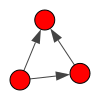

In [ ]:
# Plot a network diagram of the motif
graph = igraph.Graph.TupleList([[1, 3], [2, 3], [2, 1]], directed=True)
igraph.drawing.plot(graph, bbox=[0, 0, 100, 100])

Calling the `igraph.Graph.isoclass` method on the three-vertex igraph graph. It should return 7.

In [ ]:
# print the isomorphism class
igraph.Graph.isoclass(graph)

7

## Question 2, part B

_What are the mean and standard deviation of the MM counts for the 1,000 random networks?_

Getting the motif counts for 10,000 different randomizations of the network.  

In [ ]:
motif_cts = []

for i in range(0, 10000):
  # make a copy of the ecoli network
  new_graph = igraph.Graph.copy(ecoli_graph)
  # rewire the graph
  igraph.Graph.rewire(new_graph, n=1000)
  # calculate and save the motif counts
  motif_cts.append(np.array(new_graph.motifs_randesu()))


For each motif type, computing the mean and standard deviation of the counts of appearances of the motif in each of the 10,000 randomly rewired graphs.

In [ ]:
means = np.mean(motif_cts, axis=0)
stds = np.std(motif_cts, axis=0)

Printing out the mean and the standard deviation of the numbers of feed-forward loops (FFLs) in random networks. Print the number of FFLs on the real network. The FFL should be at index position 7 (starting from zero!) of the vector returned from motifs_randesu.

In [ ]:
print(f"Mean FFL in Random Network: {means[7]:0.4f}")
print(f"Standard Deviation of FFL in Random Network: {stds[7]:0.4f}")
print(f"Number of FFL in Real Network: {ecoli_motif[7]}")

Mean FFL in Random Network: 57.2079
Standard Deviation of FFL in Random Network: 9.2978
Number of FFL in Real Network: 47


## Question 3

_What is the Z-score for enrichment of the MM count for the real network vs. the ensemble of random networks?  Does this Z-score correspond to a statistically significant positive enrichment?_

For each motif type, obtain the *Z* score for the number of appearances of the motif in the real network, vs. in the randomly rewired networks. Note, some of the motif counts are all zero, so we will set NumPy to ignore divide-by-zero errors before we do the vector element-wise division operation.

In [ ]:
np.seterr(divide='ignore')

# add code to compute the z-score
zscr = (ecoli_motif - means)/stds

Print the _z_-score for the FFL

## Answer to Question 3

In [ ]:
print(f"Z-score for the FFL count on the real network vs. the random networks: {zscr[7]}")

Z-score for the FFL count on the real network vs. the random networks: -1.0978846862755127


## Question 4.

_What is the ratio of the MM count for the real network to the average MM count for the random networks?_

Printing out the ratio of the FFL count for the real network, to the average FFL count for the random networks

## Answer to Question 4

In [ ]:
ratio = ecoli_motif[7]/means[7]

print(f"Ratio of FFL Count (Real Network/Avg of Random Networks): {ratio: 0.4f}")

Ratio of FFL Count (Real Network/Avg of Random Networks):  0.8216


## Question 5.

_How does ratio compare to the same ratio for the data in Table 1 in Shen-Orr et al., Nature Genetics, 2002?_

Adding up the first two rows of Table 1 in Shen-Orr et al., we get a count of 40 FFLs in the real network vs. an average of 6.9 in the randomized networks. Print the ratio:

## Answer to Question 5

In [ ]:
so_ratio = 40/6.9
print(f"Shen-Orr Ratio: {so_ratio: 0.3f}")

Shen-Orr Ratio:  5.797


## Question 6

_Given the modest ratio of the MM frequency in the real network vs. randomly shuffled network, should we entertain the possibility that the high frequency of MMs in the real network could be a consequence of the degree distribution rather than evolution specifically “favoring” FFLs as a building block for gene regulatory networks?_

Yes, I think this is possible, it could be likely that there was a higher degree distribution in the real network, given that the ratio between the random network and the real network is very small, less than 1.

# Part II. Four-vertex motif analysis

## Question 1

_What is the count of this four-vertex motif in the E. coli gene regulatory network?_

Figuring out the isomorphism class of the network shown in the assignment.

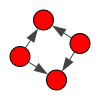

In [ ]:
# build the graph and print out a summary
graph2 = igraph.Graph.TupleList([[1, 3], [1, 4], [2, 3], [2, 4]], directed=True)
graph2.summary()
igraph.drawing.plot(graph2, bbox=[0, 0, 100, 100])


In [ ]:
graph2.isoclass()

19

Compute the number of appearances of this four-vertex motif in the real network, using `motifs` with `size=4`.

## Answer to Question 1

In [ ]:
ecoli_motifs2 = ecoli_graph.motifs_randesu(size=4)[19]
ecoli_motifs2

297

## Question 2

_What are the average (and standard deviation) of the counts of this motif in 10,000 randomly shuffled networks?_

(you can compute this similarly to what you did for the three- vertex motifs above).

Get the mean and standard deviation for the count of four-vertex motifs in 10,000 randomly rewired graphs.  You will need to use a `for` loop, `igraph.Graph.copy`, `igraph.Graph.rewire`, and `list.append`.  You can specify *n*=1,000 for the rewiring.

In [ ]:
motif_cts2 = []

for i in range(0, 10000):
  # make a copy of the ecoli network
  new_graph = igraph.Graph.copy(ecoli_graph)
  # rewire the graph
  igraph.Graph.rewire(new_graph, n=1000)
  # calculate and save the motif counts
  motif_cts2.append(np.array(new_graph.motifs_randesu(size=4)))

Using `numpy.mean` and `numpy.stdev` to compute the mean and standard deviation of the counts of this motif on the randomly rewired graphs.

## Answer to Question 2

In [ ]:
means2 = np.mean(motif_cts2, axis=0)
stds2 = np.std(motif_cts2, axis=0)

print(f"Mean: {means2[19]:0.4f}")
print(f"Standard Deviation: {stds2[19]:0.4f}")


Mean: 177.8978
Standard Deviation: 38.6215


## Question 3

_What is the *Z*-score for enrichment of this four-vertex motif?  Is it significant?_

Printing out the mean number of 4-vertex dense overlapping region (DOR) motifs for the random networks, the standard deviation, and the *Z* score for the DOR motif count in the real graph vs. the random graphs.

## Answer to Question 3

In [ ]:
zscr2 = (ecoli_motifs2 - means2)/stds2

print(f"Mean 4-Vertex DOR Motif for Random Networks: {means2[19]}")
print(f"Standard Deviation of 4-Vertex DOR Motif for Random Networks: {stds2[19]:0.4f}")
print(f"Z-Score for DOR Motif Count for Real vs. Random Networks: {zscr2[19]:0.4f}")

Mean 4-Vertex DOR Motif for Random Networks: 177.8978
Standard Deviation of 4-Vertex DOR Motif for Random Networks: 38.6215
Z-Score for DOR Motif Count for Real vs. Random Networks: 3.0838


As seen above, the z-score tells us that the mean of the random network is very different from the observed data of the real network, which shows that it is significant.

## Question 4

_What is the ratio of the count in the real network to the average count for the random networks?  How does this ratio compare to the ratio that you obtain from Table 1 from Shen-Orr et al.? Are they consistent? Does this suggest that Shen-Orr’s actual network randomization procedure is possibly not consistent with their description in the Methods section of their paper, i.e., that it may have had some kind of error? (if you are interested in this topic, see the paper by Konagurthu and Lesk, BMC Systems Biology, 2008, 2:73 [Konagurthu_BMCSystBiol_2008.pdf](https://drive.google.com/file/d/1yO-ZXc0SZpwsLFyr_14n3AsP1T-PjAYu/view?usp=share_link)_

## Answer to Question 4

The ratio for the count in the real network is 1.669, (297/177.8978). The ratio from Shen-Orr et al in Table 1 is 3.561 (203/57). The ratio from Shen Orr et al is much larger and inconsistent with the one found in this analysis, which is likely due to the significant difference in the mean motif counts between the random networks. Shen Orr et al's mean motif count for their random network was 57, while our randomized network's mean motif count was 177.8978. It does suggest that Shen-Orr's network randomization process is different that ours, as they used randomized connectivity matrices which is likely generated differently than our method of using rewire.